In [ ]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import os
from PIL import Image
from io import BytesIO
import time

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import  Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2721173182146015956
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10641431736162363993
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def souhaiel_model(tf,wgts='fightw.hdfs'):
    layers = tf.keras.layers
    models = tf.keras.models
    losses = tf.keras.losses
    optimizers = tf.keras.optimizers
    metrics = tf.keras.metrics
    num_classes = 2
    cnn = models.Sequential()
    #cnn.add(base_model)
    input_shapes=(160,160,3)
    np.random.seed(1234)
    vg19 = tf.keras.applications.vgg19.VGG19
    base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
    # Freeze the layers except the last 4 layers (we will only use the base model to extract features)
    cnn = models.Sequential()
    cnn.add(base_model)
    cnn.add(layers.Flatten())
    model = models.Sequential()
    model.add(layers.TimeDistributed(cnn,  input_shape=(30, 160, 160, 3)))
    model.add(layers.LSTM(30 , return_sequences= True))
    model.add(layers.TimeDistributed(layers.Dense(90)))
    model.add(layers.Dropout(0.1))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation="sigmoid"))
    adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.load_weights(wgts)
    rms = optimizers.RMSprop()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
    return model


In [ ]:
model1 = souhaiel_model(tf,wgts='/content/drive/MyDrive/폭력 탐지 모델/fightw.hdfs')
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 30, 12800)        20024384  
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 30, 30)            1539720   
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 90)           2790      
 tributed)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 30, 90)            0         
                                                                 
 global_average_pooling1d_1   (None, 90)               0         
 (GlobalAveragePooling1D)                                        
                                                      

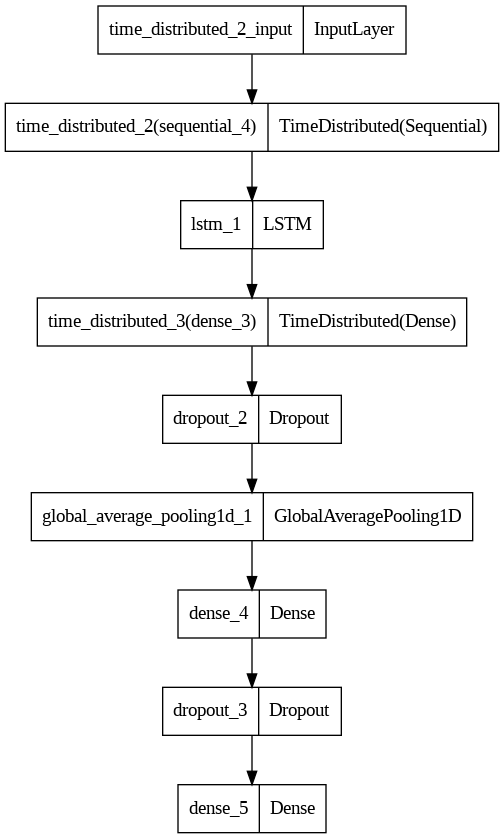

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='souhaiel.png')

In [ ]:
import numpy as np
from skimage.transform import resize
np.random.seed(1234)
model1 = souhaiel_model(tf,wgts='/content/drive/MyDrive/폭력 탐지 모델/fightw.hdfs')

In [ ]:
graph = tf.compat.v1.get_default_graph

In [ ]:
graph

<function tensorflow.python.framework.ops.get_default_graph()>

In [ ]:
def video_reader(cv2,filename):
    frames = np.zeros((30, 160, 160, 3), dtype=np.float)
    i=0
    print(frames.shape)
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    frm = resize(frame,(160,160,3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    print("reading video")
    while i < 30:
        rval, frame = vc.read()
        frm = resize(frame,(160,160,3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
    return frames

In [ ]:
# for 영상 in 폴더:
    # frm = video_reader(cv2, 영상)
    # video_lst.append(frm)

In [ ]:
lst = []

In [ ]:
import cv2
import os

# 비디오 파일이 있는 폴더 경로
folder_path = '/content/drive/MyDrive/폭력 탐지 모델/낙상비디오 9~16/'

# 폴더 내 모든 비디오 파일 리스트 생성
video_list = os.listdir(folder_path)

# 비디오 파일들을 차례대로 읽어들이기
for video_file in video_list:
    video_path = os.path.join(folder_path, video_file)
    frm = video_reader(cv2, video_path)
    lst.append(frm)

<ipython-input-21-bcf2b196095c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames = np.zeros((30, 160, 160, 3), dtype=np.float)


(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160, 160, 3)
reading video
(30, 160

In [ ]:
model1.fit()

In [ ]:
frm = video_reader(cv2,'fightvideo.mp4')

In [ ]:
def pred_fight(model,video,acuracy=0.9):
    pred_test = model.predict(video)
    if pred_test[0][1] >=acuracy:
        return True , pred_test[0][1]
    else:
        return False , pred_test[0][1]

In [ ]:
def main_fight(vidoss):
    vid = video_reader(cv2,vidoss)
    datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)
    datav[0][:][:] = vid
    millis = int(round(time.time() * 1000))
    print(millis)
    f , precent = pred_fight(model1,datav,acuracy=0.65)
    millis2 = int(round(time.time() * 1000))
    print(millis2)
    res_fight = {'violence':f ,'violenceestimation':str(precent)}
    res_fight['processing_time'] =  str(millis2-millis)
    return res_fight

In [ ]:
res = main_fight('fightvideo.mp4')

<ipython-input-16-bcf2b196095c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames = np.zeros((30, 160, 160, 3), dtype=np.float)


(30, 160, 160, 3)
reading video


<ipython-input-19-71d1d70150f3>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)


1682920927727
1/1 [==============================] - 5s 5s/step
1682920932710


In [ ]:
res

{'violence': True,
 'violenceestimation': '0.9647758',
 'processing_time': '4983'}

In [ ]:
!python predict_video2.py --input fightvideo.mp4 --output results.avi --size 128

2023-05-01 06:02:18.601125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-01 06:02:22.695375: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-01 06:02:23.814297: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open fightw.hdfs: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
[INFO] loading model and label binarizer...
/content/predict_video2.py:62: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/

In [ ]:
# !pip uninstall opencv-python --yes

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [ ]:
# !pip install tensorrt

In [ ]:
!pip3 install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.7 MB/s eta 0:00:00


In [ ]:
# !python predict_video1.py

In [ ]:
# !python violencemodel.py

2023-05-01 04:36:26.451704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
res = main_fight('testvideo.mp4')

In [ ]:
res

In [ ]:
!python predict_video2.py --input testvideo.mp4 --output results2.avi --size 128